In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
gcr=pd.read_csv("German_Credit.csv")

In [3]:
copy=gcr.copy()

In [4]:
copy.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
0,67,male,skilled,own,little,little,1169,6,0,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,1,radio/TV
2,49,male,unskilled_and_non-resident,own,little,little,2096,12,0,education
3,45,male,skilled,free,little,little,7882,42,0,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,1,car


In [5]:
copy.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
995,31,female,unskilled_and_non-resident,own,little,little,1736,12,0,furniture/equipment
996,40,male,highly skilled,own,little,little,3857,30,0,car
997,38,male,skilled,own,little,little,804,12,0,radio/TV
998,23,male,skilled,free,little,little,1845,45,1,radio/TV
999,27,male,skilled,own,moderate,moderate,4576,45,0,car


In [6]:
copy.shape

(1000, 10)

There are 1000 entries with 10 columns in our dataset.

In [7]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Risk              1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


- There are some object attributes here like sex, job, housing, saving accounts, checking accounts and purpose in the applicants which has to be changed to int form to perfom analaysis as we can perform analysis only on quantitative values and not qualitative values.
- No missing values as per python. There are 1000 values for all attributes.


In [8]:
copy.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,2,3,3,4,3,NaN,NaN,NaN,8
top,NaN,male,skilled,own,little,moderate,NaN,NaN,NaN,car
freq,NaN,690,630,713,786,472,NaN,NaN,NaN,337
mean,35.546000,NaN,NaN,NaN,NaN,NaN,3271.258000,20.903000,0.300000,NaN
std,11.375469,NaN,NaN,NaN,NaN,NaN,2822.736876,12.058814,0.458487,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,250.000000,4.000000,0.000000,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,1365.500000,12.000000,0.000000,NaN
50%,33.000000,NaN,NaN,NaN,NaN,NaN,2319.500000,18.000000,0.000000,NaN
75%,42.000000,NaN,NaN,NaN,NaN,NaN,3972.250000,24.000000,1.000000,NaN


In [9]:
copy["Age"].nunique()

53

In [10]:
list(copy.Age)

[67,
 22,
 49,
 45,
 53,
 35,
 53,
 35,
 61,
 28,
 25,
 24,
 22,
 60,
 28,
 32,
 53,
 25,
 44,
 31,
 48,
 44,
 48,
 44,
 26,
 36,
 39,
 42,
 34,
 63,
 36,
 27,
 30,
 57,
 33,
 25,
 31,
 37,
 37,
 24,
 30,
 26,
 44,
 24,
 58,
 35,
 39,
 23,
 39,
 28,
 29,
 30,
 25,
 31,
 57,
 26,
 52,
 31,
 23,
 23,
 27,
 50,
 61,
 25,
 26,
 48,
 29,
 22,
 37,
 25,
 30,
 46,
 51,
 41,
 40,
 66,
 34,
 51,
 39,
 22,
 44,
 47,
 24,
 58,
 52,
 29,
 27,
 47,
 30,
 28,
 56,
 54,
 33,
 20,
 54,
 58,
 61,
 34,
 36,
 36,
 41,
 24,
 24,
 35,
 26,
 39,
 39,
 32,
 30,
 35,
 31,
 23,
 28,
 25,
 35,
 47,
 30,
 27,
 23,
 36,
 25,
 41,
 24,
 63,
 27,
 30,
 40,
 30,
 34,
 29,
 24,
 29,
 27,
 47,
 21,
 38,
 27,
 66,
 35,
 44,
 27,
 30,
 27,
 22,
 23,
 30,
 39,
 51,
 28,
 46,
 42,
 38,
 24,
 29,
 36,
 20,
 48,
 45,
 38,
 34,
 36,
 30,
 36,
 70,
 36,
 32,
 33,
 20,
 25,
 31,
 33,
 26,
 34,
 33,
 26,
 53,
 42,
 52,
 31,
 65,
 28,
 30,
 40,
 50,
 36,
 31,
 74,
 68,
 20,
 33,
 54,
 34,
 36,
 29,
 21,
 34,
 28,
 27,
 36,
 40,


The age has many unique values, 53. So, we can delete this column in the process the cleaning the data.

In [11]:
copy.drop(["Age"], axis=1, inplace=True)

In [12]:
copy.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000,3,skilled,630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,1000,4,little,786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,1000,3,moderate,472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Risk,1000.0,NaN,NaN,NaN,0.3,0.458487,0.0,0.0,0.0,1.0,1.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data after we deleted Age column.

## checking missing values

In [13]:
copy.isnull().sum()

Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Risk                0
Purpose             0
dtype: int64

We can see there are no missing values in our dataset.

# EDA

## Univariant Analysis

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Sex of the applicants

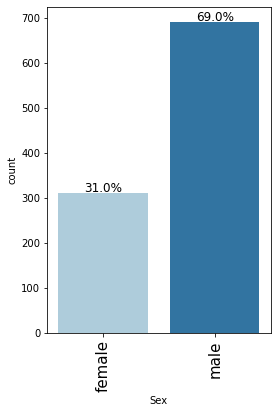

In [15]:
labeled_barplot(copy,'Sex',perc=True)

#### Observations:
- There are max number of male applicants with 69%.
- There are only 31% of female applicants for credit.

### Job of the applicants

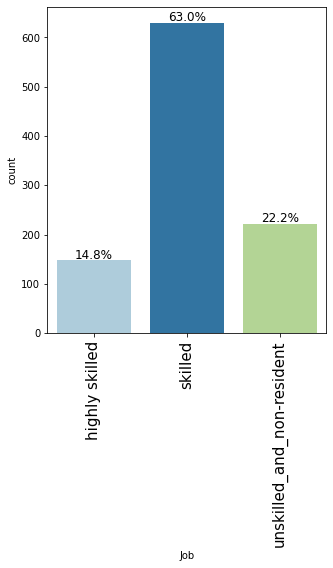

In [16]:
labeled_barplot(copy,'Job',perc=True)

#### Observations:
- There are max people who applied for credit in the bank are skilled with 63%.
- Only 22.2% of Unskilled and non resident people applied for credits.
- Least percentage of people applied belongs to highly skilled sector with only 14.8%. 
It is common sense that highlyskilled people can get good paid jobs and might not be in need for any financial help so they need not take any credits from bank.

### Housing

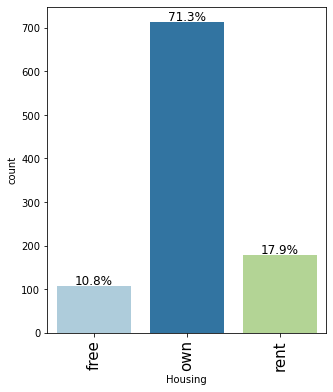

In [17]:
labeled_barplot(copy,'Housing',perc=True)

#### Observations:
- Most no. of people applied for taking credits from bank are owning a house.(71.3%)
- 17.9% applicants are staying in a rented house.
- Remaining 10.8% people are living for free.

### Savings Account

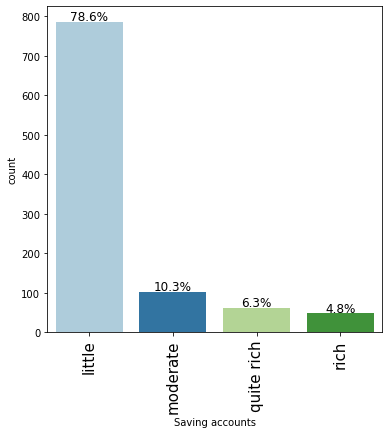

In [18]:
labeled_barplot(copy,'Saving accounts',perc=True)

#### Observations:
- Most portion of people, 78.6% applied for credits have a very little amount of money in their savings accounts. Hence they might need some financial help from banks.
- Next comes moderate amount in savings account people with 10.3%.
- quite rich people applicants are 6.3% of total applications.
- The lease are rich people who have more account balances.

### Checking account

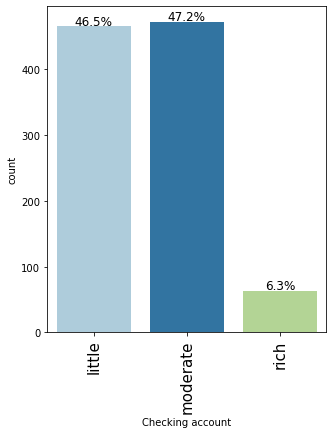

In [19]:
labeled_barplot(copy,'Checking account',perc=True)

#### Observations:
- There are 47.2%, highest, of moderate amount in their checking accounts who applied for credits.
- 46.5% of applicants have little amount in their checkings account.
- Only 6.3% are rich.

### Duration

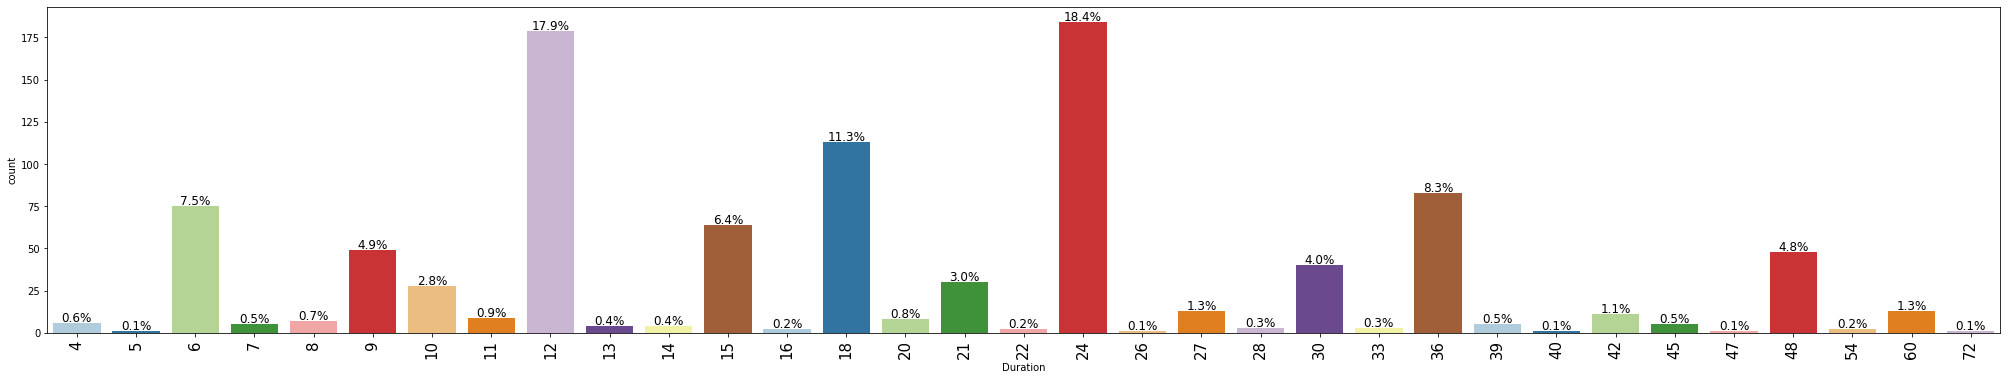

In [20]:
labeled_barplot(copy,'Duration',perc=True)

#### Observations:
- The durations for loans applied started with min 4 months - 72 months.
- Most people applied for 24 months i.e., 18.4%.
- next most frequently applied durations is 12 months wih 17.9%.
- Lease portion of people, 0.1% of applicants have applied for 5, 26, 40, 47 and 72 months.

### Risk

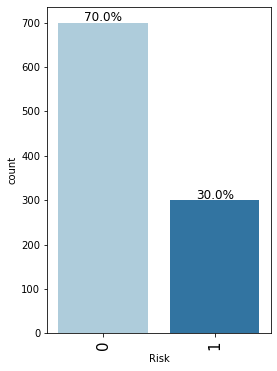

In [21]:
labeled_barplot(copy,'Risk',perc=True)

#### Observations:
- There are most applicants, 70% who are allerted as non-risk right now.
- only 30% of people are alerted as risk.

### Purpose

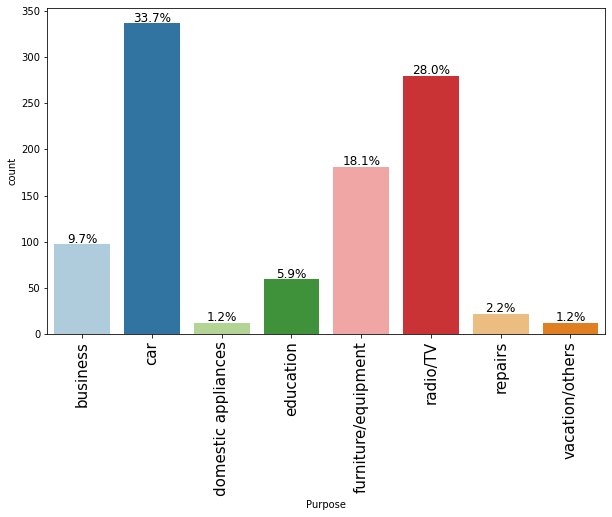

In [22]:
labeled_barplot(copy,'Purpose',perc=True)

#### Observations:
- Most people are applying for credits from bank is to buy a car - 33.7%.
- Next highest rated purpose for people to take credits will be to buy a Radio/TV with 28%.
- Lease portion of people are applying for creits to buy domestic appliances and for vacations/others with 1.2%.
Remaining purposes like business, education, furniture/equipment and repairs are in between these highest and lowest rated purposes.

## Bivariante Analysis

In [23]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### RISK Vs SEX

Risk      0    1   All
Sex                   
All     700  300  1000
male    499  191   690
female  201  109   310
------------------------------------------------------------------------------------------------------------------------


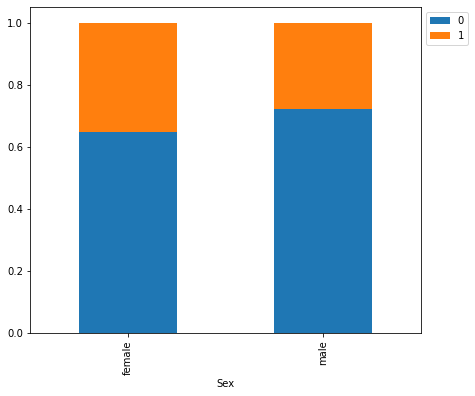

In [24]:
stacked_barplot(copy, "Sex", "Risk")

#### Observations:
- From initial analysis we can see that there are more female applicants who are classified as Risk than male applicants.

### RISK Vs JOB

Risk                          0    1   All
Job                                       
All                         700  300  1000
skilled                     444  186   630
unskilled_and_non-resident  159   63   222
highly skilled               97   51   148
------------------------------------------------------------------------------------------------------------------------


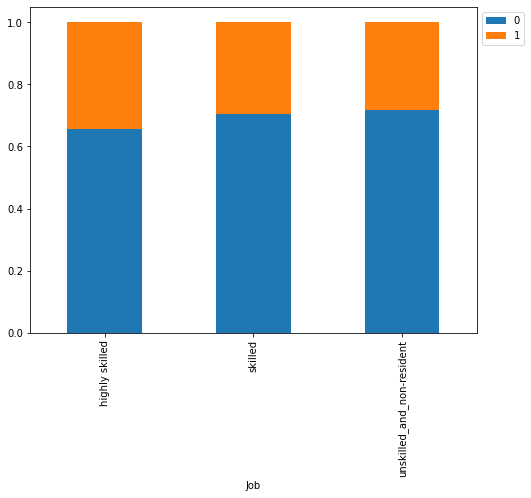

In [25]:
stacked_barplot(copy, "Job", "Risk")

#### Observations:
- We can observe there are more highly skilled people who are classfied as RISK.
- Least applicants classified as RISK are unskilled and non resident.
- even though more applicants are skilled, the portion of them classified as RISK is less comparative with highly skilled people.

### RISK Vs HOUSING

Risk       0    1   All
Housing                
All      700  300  1000
own      527  186   713
rent     109   70   179
free      64   44   108
------------------------------------------------------------------------------------------------------------------------


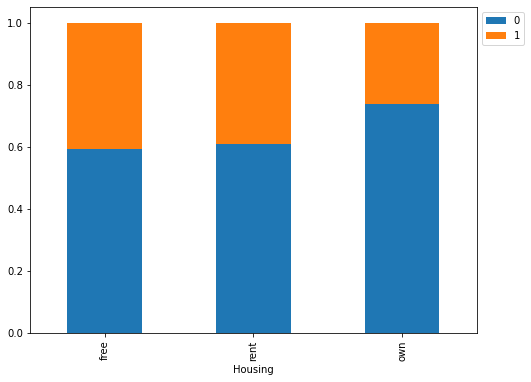

In [26]:
stacked_barplot(copy, "Housing", "Risk")

#### Observations:
- There are more people who are living for free are said to be more risky to give credit to than people who own a house or who are living in a rented place.
- Least people who own a house are classified as risk as they can repay the money to bank using their house by keeping mortgage.

### RISK Vs SAVINGS ACCOUNT

Risk               0    1   All
Saving accounts                
All              700  300  1000
little           537  249   786
moderate          69   34   103
quite rich        52   11    63
rich              42    6    48
------------------------------------------------------------------------------------------------------------------------


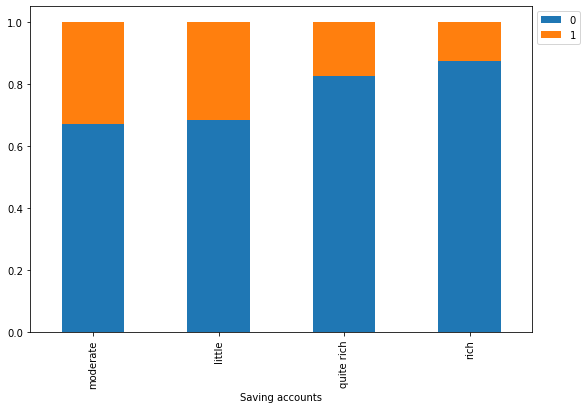

In [27]:
stacked_barplot(copy, "Saving accounts", "Risk")

#### Observations:
- People with more money in their savings accounts are considered to be least risky.
- People who have moderate amount in their savings accounts are most risk.
- People who are rich can repay their loans on time so there are classified as risk.


### RISK Vs CHECKING ACCOUNTS

Risk                0    1   All
Checking account                
All               700  300  1000
little            304  161   465
moderate          347  125   472
rich               49   14    63
------------------------------------------------------------------------------------------------------------------------


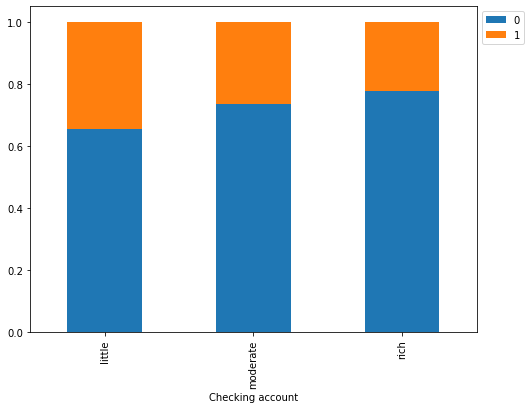

In [28]:
stacked_barplot(copy, "Checking account", "Risk")

#### Observations:
- People who have little amount in their checking accounts are most risk to banks as they might be able to repay their loans and bank's resources might be wasted.
- Same as in savings account, people who are rich can repay their loans easily to banks so are considered as least risky.

In [29]:
### Function to plot boxplot
def boxplot(x):
    plt.figure(figsize=(10,7))
    sns.boxplot(data=copy, x="Risk",y=copy[x],palette="PuBu")
    plt.show()

### RISK Vs CREDIT AMOUNT

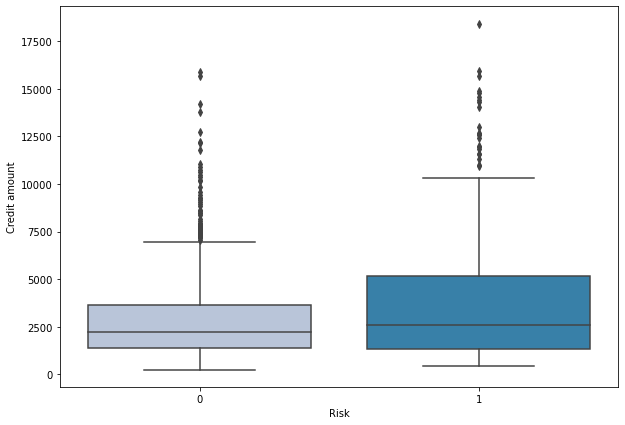

In [30]:
boxplot('Credit amount')

#### Observations:
- People who take more credit amount as loan are most likely to default to repay so are classified as Risk.

### RISK Vs DURATION

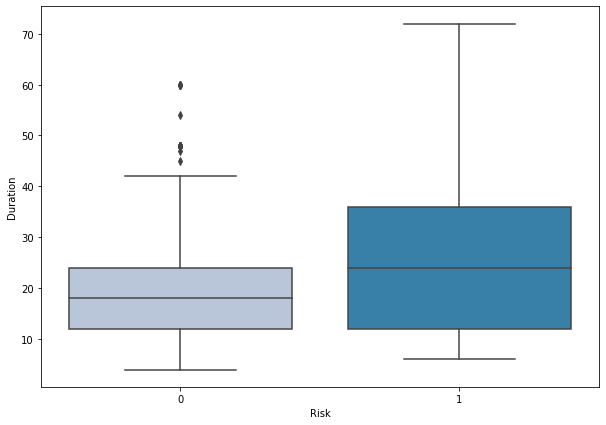

In [31]:
boxplot('Duration')

#### Observations:
- People who take loans for more months are tend to be more risky than people who take a short term loan.

## Correlation

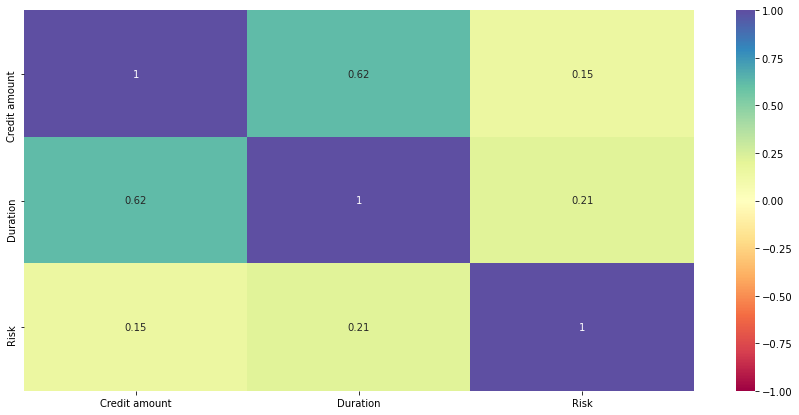

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(copy.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

## Missing value Treatment

In [33]:
# Checking which columns have zero values
(copy == 0).sum()

Sex                   0
Job                   0
Housing               0
Saving accounts       0
Checking account      0
Credit amount         0
Duration              0
Risk                700
Purpose               0
dtype: int64

There can be 0's in Risk as it binary, But there are any 0's or missing values in any other columns. So no need for any other action.

## Creating dummy variables

In [34]:
copy = pd.get_dummies(copy)

In [35]:
copy.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Risk,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
Sex_female,1000.0,0.310,0.462725,0.0,0.0,0.0,1.00,1.0
Sex_male,1000.0,0.690,0.462725,0.0,0.0,1.0,1.00,1.0
Job_highly skilled,1000.0,0.148,0.355278,0.0,0.0,0.0,0.00,1.0
Job_skilled,1000.0,0.630,0.483046,0.0,0.0,1.0,1.00,1.0
Job_unskilled_and_non-resident,1000.0,0.222,0.415799,0.0,0.0,0.0,0.00,1.0
Housing_free,1000.0,0.108,0.310536,0.0,0.0,0.0,0.00,1.0
Housing_own,1000.0,0.713,0.452588,0.0,0.0,1.0,1.00,1.0


In [36]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Credit amount                   1000 non-null   int64
 1   Duration                        1000 non-null   int64
 2   Risk                            1000 non-null   int64
 3   Sex_female                      1000 non-null   uint8
 4   Sex_male                        1000 non-null   uint8
 5   Job_highly skilled              1000 non-null   uint8
 6   Job_skilled                     1000 non-null   uint8
 7   Job_unskilled_and_non-resident  1000 non-null   uint8
 8   Housing_free                    1000 non-null   uint8
 9   Housing_own                     1000 non-null   uint8
 10  Housing_rent                    1000 non-null   uint8
 11  Saving accounts_little          1000 non-null   uint8
 12  Saving accounts_moderate        1000 non-null   uint8
 13  Savi

After creating variables for all quanlitative attributes, all of them are converted into quantitative values so that we can proceed with model building easily.

# Model Building

## Split Data

In [37]:
X = copy.drop('Risk',axis=1)
y = copy['Risk'] 

# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(700, 25) (300, 25)


We have splitted data into 70:30 ration so the train set has 700 values out of 1000 and test set has 300 values out of 1000. And all have 25 attributes(increased due to dummies).

#### Checking class distribution between train and test data.

In [38]:
y.value_counts(1)

0    0.7
1    0.3
Name: Risk, dtype: float64

In [39]:
y_test.value_counts(1)

0    0.7
1    0.3
Name: Risk, dtype: float64

Values of classes are same for both test and train data.So, the splitting data is done in a balanced manner.

## Model evaluation Criteria

### The model can make wrong predictions as:

1. If a potential customer is misclassified as being at Risk, the bank will not give the loan to 
that person. This will be a loss of opportunity to earn interest on the potential loan.
2. If a customer is misclassified as NOT being at Risk, they may be given the loan 
but may default later. This will be a loss of resources.

### Which case is more important?

Both cases are not good for a banking sector. Both can cause bad business impacts both financially and branding wise so rather just increasing recall or precision, we try to implement a balance here i.e., improve F1 value. 

### Which metric to optimize?

We need to optimise F1 value to have a balanced model.

In [40]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [41]:
# function to create Confusion matrix
def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

## Decision Tree Model

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0      0.62  0.344444   0.360465  0.352273


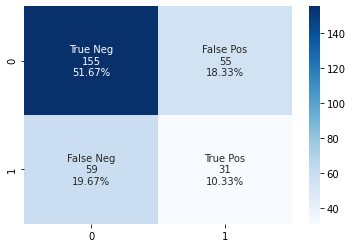

In [42]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

#### Observations:
- The metrics for train and test data have so much difference. The metrics of Train test is too high when compared to test set.
- We can say the model is overfitting.
- The F1 value is too low = 35%

## Random Forest Model

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0      0.65  0.277778   0.384615  0.322581


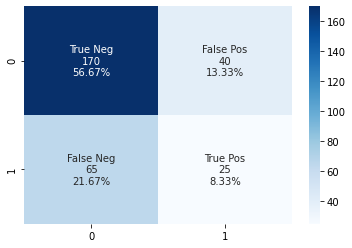

In [43]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

#### Observations:
- The train and test set values are too different from each other, so the data is overfitting.
- F1 value is too low, 32% when we need to have a better performance in the model.

We need to tune hyperparameters and improve the performance of our model.

## Tuning decision Tree

In [44]:
#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1) # using reverse class weights

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,8,1), 
              'min_samples_leaf': [5, 7, 10],
              'max_leaf_nodes' : [3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=4,
                       max_leaf_nodes=5, min_impurity_decrease=0.0001,
                       min_samples_leaf=7, random_state=1)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.677143  0.633333   0.471631  0.54065
Testing performance:
    Accuracy    Recall  Precision        F1
0      0.59  0.511111      0.368  0.427907


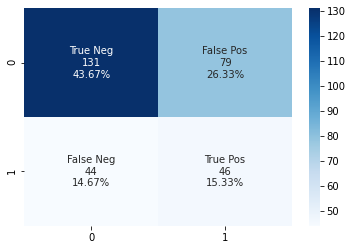

In [45]:
#Calculating different metrics
dtree_tuned_model_train_perf=model_performance_classification_sklearn(dtree_tuned,X_train,y_train)
print("Training performance:\n",dtree_tuned_model_train_perf)
dtree_tuned_model_test_perf=model_performance_classification_sklearn(dtree_tuned,X_test,y_test)
print("Testing performance:\n",dtree_tuned_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(dtree_tuned, X_test, y_test)

After few changes in the class weights i.e., using revenrse class weights, 0 wit 35% and 1 with 65%,we can get an optimal values of metrics.
- Both train and test performances are much similar compared to last performance. The model is not overfitting now.
- f1 Value has increased to 43% from 35%.
- All other metrics are good comparitive last performance.
- by increasing or decreasing the class weights other than these are causing the model to have low f1 metrics. So these values are choosen to be optimal values.

## Tuning Random Forest

In [46]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.75},random_state=1)

parameters = {  
                'max_depth': list(np.arange(2,8,1)),
                'max_features': np.arange(0.5,0.8,0.1),
                'max_samples': np.arange(0.8,1,0.1),
                'min_samples_split': np.arange(1, 15, 5),
                'n_estimators': np.arange(20,100,20),
                'min_impurity_decrease': [0.001,0.01,0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-4)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.35, 1: 0.75}, max_depth=5,
                       max_features=0.7999999999999999, max_samples=0.8,
                       min_impurity_decrease=0.01, min_samples_split=6,
                       n_estimators=20, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0      0.73  0.614286   0.544304  0.577181
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.623333  0.511111        0.4  0.44878


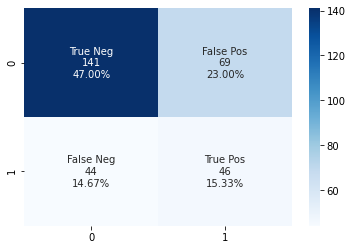

In [47]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

After tuning the random forest, we have improved results but not excellent performance of the metrics.
- F1 value has increased from 32% to 45%.
- The metrics are not too high so they are not overfitting.
- The train and test performance is similar so its not underfitting too.
- from this analysis we have improved f1, the recall has increased by decreasing False Neg so our model do no classify people as Not Risks and we need not worry about loosing resurces. Precision is also increased after tuning the model, so now the model decreased false Positives i.e., it does not tell potential applicants as RISK so that we could give our loans to more people and improve our financials.

## Comparing all the models

In [48]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,dtree_tuned_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned
Accuracy,1.0,0.677143,1.0,0.730000
Recall,1.0,0.633333,1.0,0.614286
Precision,1.0,0.471631,1.0,0.544304
F1,1.0,0.540650,1.0,0.577181


In [49]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_tuned_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    ]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned
Accuracy,0.620000,0.590000,0.650000,0.623333
Recall,0.344444,0.511111,0.277778,0.511111
Precision,0.360465,0.368000,0.384615,0.400000
F1,0.352273,0.427907,0.322581,0.448780


#### Observations:
- As we are focusing F1 metrics, we can say from the above table that Tuned Random Forest model is doing better when compared to other models as it has the highest values.
- In Tuned Random Forest model we have improved precision as well and Recall is also better than other models.
- The values of Tuned Random Forest model train and test performance gives similar results so they are not underfitting and also their results are not too high in train and not that good as in test like in Decision Tree and Random Forest model, So it is not overfitting as well.

# Feature importance of Random Forest Tuned Model

In [50]:
# Text report showing the rules of a Random Forest Tuned -
rf_tuned.feature_importances_

array([0.38043706, 0.4451192 , 0.02588813, 0.00528367, 0.0178866 ,
       0.        , 0.        , 0.00667068, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02262093, 0.03517735,
       0.        , 0.00791247, 0.        , 0.        , 0.00574977,
       0.00532187, 0.01119529, 0.03073697, 0.        , 0.        ])

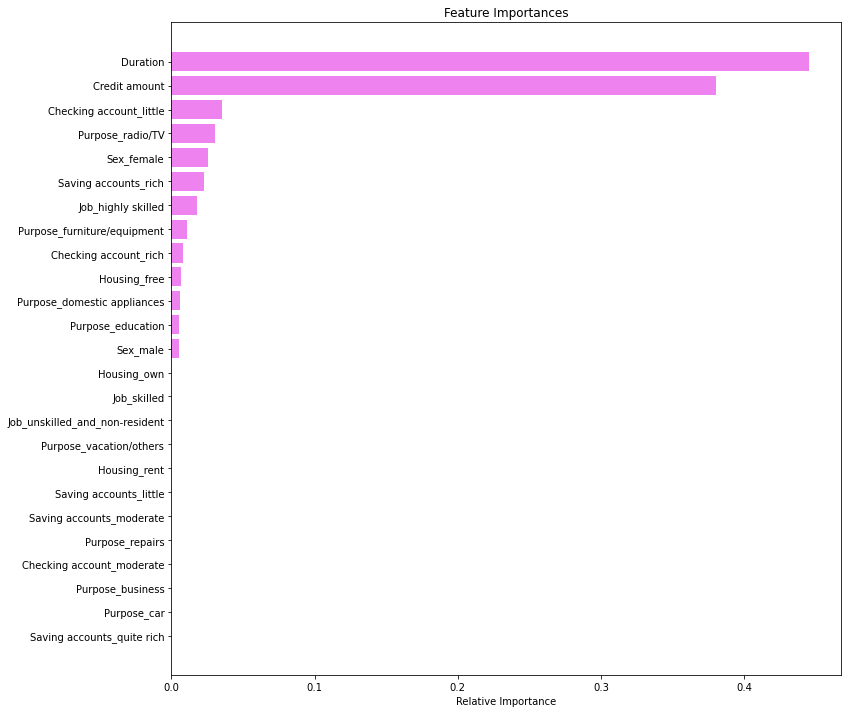

In [51]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- We can see that Duration is the highest feature for this model followed by Credit amount, Checking account_little, Purpose_ratio/TV, Sex_female, Savings accounts_rich,Job_highly skilled, Purpose_furniture/equipment, Checking account_rich, Housing_free, Purpose_domestic appliances, Purpose_education, Sex_male.
- Remaining variables are not used in making classes in our tuned random Forest model.

# Conclusions

- Important features of the model are - Credit amount, Checking account_little, Purpose_ratio/TV, Sex_female, Savings accounts_rich,Job_highly skilled, Purpose_furniture/equipment, Checking account_rich, Housing_free, Purpose_domestic appliances, Purpose_education, Sex_male.
- With imporvement in the performance of the model, bank can apply it to find out the risk factor in giving a new applicant credit.
- WIth good results, the bank can know which applicant is not risky and will pay back the money and also the person who is most likely to default the loan. In this way bank can save their resources and also increase their interest and give more non-risk people credits.
- SInce all the models are not giving such a good performance the banks cannot rely completely on these models until improved their performances. 
- According to the model, bank is depending only on 13 features out of 25.
- People who take more credit amounts for a long duration with little money in their checking accounts, especially female are more risky than compared to others.